In [54]:
import pandas as pd

In [55]:
!ls source_data/

elec.csv	    meteo-lyon.csv	   meteo-paris.csv
meteo-bordeaux.csv  meteo-montpellier.csv  meteo-rouen.csv
meteo-dijon.csv     meteo-nantes.csv	   meteo-strasbourg.csv
meteo-lille.csv     meteo-nice.csv	   meteo-toulouse.csv


In [56]:
electricity_2023_raw = pd.read_csv('source_data/elec.csv')
electricity_2023_raw

,Time (UTC),Day-ahead Total Load Forecast [MW] - France (FR),Actual Total Load [MW] - France (FR)
0,01.01.2023 00:00 - 01.01.2023 01:00,44100,45709.0
1,01.01.2023 01:00 - 01.01.2023 02:00,43750,44640.0
2,01.01.2023 02:00 - 01.01.2023 03:00,40400,41533.0
3,01.01.2023 03:00 - 01.01.2023 04:00,37900,39248.0
4,01.01.2023 04:00 - 01.01.2023 05:00,36800,38389.0
...,...,...,...
8755,31.12.2023 19:00 - 31.12.2023 20:00,51850,53070.0
8756,31.12.2023 20:00 - 31.12.2023 21:00,50350,51502.0
8757,31.12.2023 21:00 - 31.12.2023 22:00,51250,52964.0
8758,31.12.2023 22:00 - 31.12.2023 23:00,53250,54105.0


In [57]:
def extract_start_date(date_range):
    start_date_str = date_range.split(' - ')[0]
    start_date = pd.to_datetime(start_date_str, format='%d.%m.%Y %H:%M')
    return start_date

extract_start_date(electricity_2023_raw["Time (UTC)"].iloc[0])

Timestamp('2023-01-01 00:00:00')

In [58]:
electricity_2023 = electricity_2023_raw.copy()
electricity_2023["time_utc"] = electricity_2023['Time (UTC)'].map(extract_start_date)
electricity_2023 = electricity_2023.drop(
    columns=['Time (UTC)', "Day-ahead Total Load Forecast [MW] - France (FR)"]
)
electricity_2023 = electricity_2023.rename(columns={
    "Actual Total Load [MW] - France (FR)": "actual_load_MW"
})

In [185]:
import pandas as pn
import os
meteos = []


rootdir ='source_data/'

meteo_dijon = pn.read_csv("source_data/meteo-dijon.csv", header=2)
meteo_2023 = pn.DataFrame({"time":meteo_dijon["time"]})
#print(ulti_df)
#ulti_df= pn.DataFrame()

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if "meteo-" in file :
            city = file[6:-4]
            city_df = pn.read_csv(rootdir+file, header=2)
            
            for elt in city_df.dtypes.keys():
                if(elt != "time"):
                    city_df = city_df.rename(columns={
                        elt: city+"_"+elt
                    })
            print(city_df)
            meteo_2023 = pn.merge(meteo_2023, city_df, on="time", how="outer")
            
#print(meteos)

meteo_2023["time_utc"] = pd.to_datetime(meteo_2023["time"], format='%Y-%m-%dT%H:%M')
meteo_2023 = meteo_2023.drop(columns=["time"])
meteo_2023
    

                  time  bordeaux_temperature_2m (°C)  bordeaux_snowfall (cm)  \
0     2023-01-01T00:00                          11.1                     0.0   
1     2023-01-01T01:00                          10.8                     0.0   
2     2023-01-01T02:00                          10.5                     0.0   
3     2023-01-01T03:00                          10.5                     0.0   
4     2023-01-01T04:00                          10.4                     0.0   
...                ...                           ...                     ...   
8779  2024-01-01T19:00                           7.4                     0.0   
8780  2024-01-01T20:00                           6.9                     0.0   
8781  2024-01-01T21:00                           7.0                     0.0   
8782  2024-01-01T22:00                           6.9                     0.0   
8783  2024-01-01T23:00                           7.1                     0.0   

      bordeaux_wind_speed_10m (km/h)  b

,bordeaux_temperature_2m (°C),bordeaux_snowfall (cm),bordeaux_wind_speed_10m (km/h),bordeaux_cloud_cover (%),bordeaux_relative_humidity_2m (%),lyon_temperature_2m (°C),lyon_snowfall (cm),lyon_wind_speed_10m (km/h),lyon_cloud_cover (%),lyon_relative_humidity_2m (%),...,lille_snowfall (cm),lille_wind_speed_10m (km/h),lille_cloud_cover (%),lille_relative_humidity_2m (%),toulouse_temperature_2m (°C),toulouse_snowfall (cm),toulouse_wind_speed_10m (km/h),toulouse_cloud_cover (%),toulouse_relative_humidity_2m (%),time_utc
0,11.1,0.0,19.8,74,94,12.1,0.0,23.4,75,72,...,0.0,35.7,100,52,11.0,0.0,17.9,80,93,2023-01-01 00:00:00
1,10.8,0.0,18.5,78,94,11.9,0.0,22.7,43,70,...,0.0,36.5,100,56,11.1,0.0,17.8,90,90,2023-01-01 01:00:00
2,10.5,0.0,16.3,59,95,11.6,0.0,23.1,70,74,...,0.0,35.3,100,61,10.8,0.0,16.9,95,91,2023-01-01 02:00:00
3,10.5,0.0,16.4,77,96,11.5,0.0,22.8,55,77,...,0.0,31.3,100,66,10.4,0.0,15.2,92,91,2023-01-01 03:00:00
4,10.4,0.0,16.0,75,96,11.4,0.0,23.7,68,78,...,0.0,27.3,100,68,10.8,0.0,16.4,98,88,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,7.4,0.0,11.0,99,90,3.5,0.0,6.1,9,90,...,0.0,23.8,100,85,4.4,0.0,9.1,14,89,2024-01-01 19:00:00
8780,6.9,0.0,9.4,100,89,3.3,0.0,6.6,100,88,...,0.0,27.3,100,86,4.0,0.0,8.4,99,86,2024-01-01 20:00:00
8781,7.0,0.0,11.6,100,86,3.6,0.0,6.8,100,86,...,0.0,28.6,100,89,3.7,0.0,7.0,99,87,2024-01-01 21:00:00
8782,6.9,0.0,11.5,100,83,3.8,0.0,7.2,100,86,...,0.0,30.6,100,89,4.0,0.0,7.3,69,85,2024-01-01 22:00:00


In [186]:
from datetime import date
import holidays

merged_data = pd.merge(electricity_2023, meteo_2023, on="time_utc")


us_holidays = holidays.US()

fr_holidays = holidays.country_holidays('FR')

test_data = merged_data.copy()

lst_holy = []

for date_heure in merged_data['time_utc']:
    lst_holy.append(date_heure in fr_holidays)

merged_data['is_holy'] = lst_holy

merged_data.dtypes


actual_load_MW                                 float64
time_utc                                datetime64[ns]
bordeaux_temperature_2m (°C)                   float64
bordeaux_snowfall (cm)                         float64
bordeaux_wind_speed_10m (km/h)                 float64
bordeaux_cloud_cover (%)                         int64
bordeaux_relative_humidity_2m (%)                int64
lyon_temperature_2m (°C)                       float64
lyon_snowfall (cm)                             float64
lyon_wind_speed_10m (km/h)                     float64
lyon_cloud_cover (%)                             int64
lyon_relative_humidity_2m (%)                    int64
rouen_temperature_2m (°C)                      float64
rouen_snowfall (cm)                            float64
rouen_wind_speed_10m (km/h)                    float64
rouen_cloud_cover (%)                            int64
rouen_relative_humidity_2m (%)                   int64
montpellier_temperature_2m (°C)                float64
montpellie

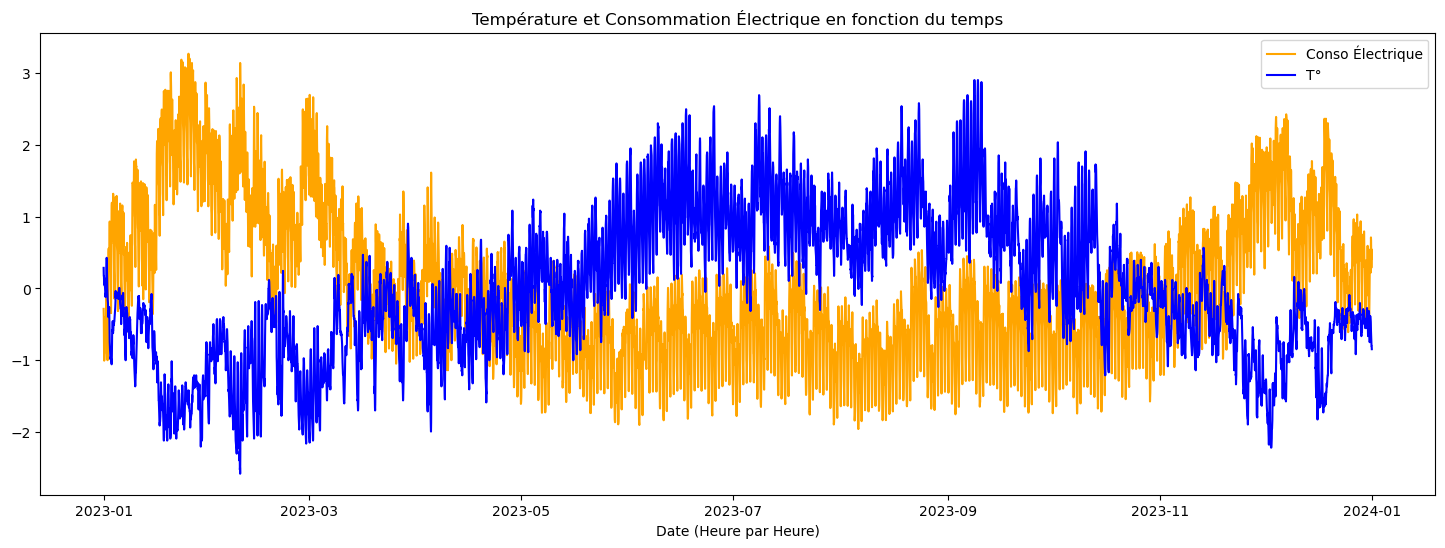

,actual_load_MW,bordeaux_temperature_2m (°C),bordeaux_snowfall (cm),bordeaux_wind_speed_10m (km/h),bordeaux_cloud_cover (%),bordeaux_relative_humidity_2m (%),lyon_temperature_2m (°C),lyon_snowfall (cm),lyon_wind_speed_10m (km/h),lyon_cloud_cover (%),...,lille_wind_speed_10m (km/h),lille_cloud_cover (%),lille_relative_humidity_2m (%),toulouse_temperature_2m (°C),toulouse_snowfall (cm),toulouse_wind_speed_10m (km/h),toulouse_cloud_cover (%),toulouse_relative_humidity_2m (%),time_utc,is_holy
0,-0.284627,-0.428236,-0.02017,1.508025,0.340668,1.062078,-0.094461,-0.071868,2.605085,0.361699,...,2.567444,0.84514,-1.806069,-0.448801,-0.044336,1.158699,0.476017,1.063368,2023-01-01 00:00:00,True
1,-0.390098,-0.468265,-0.02017,1.285943,0.436719,1.062078,-0.119740,-0.071868,2.478658,-0.424318,...,2.670361,0.84514,-1.530709,-0.435952,-0.044336,1.142432,0.719363,0.882841,2023-01-01 01:00:00,True
2,-0.696646,-0.508293,-0.02017,0.910114,-0.019526,1.123786,-0.157659,-0.071868,2.550902,0.238884,...,2.515986,0.84514,-1.186508,-0.474501,-0.044336,0.996026,0.841037,0.943017,2023-01-01 02:00:00,True
3,-0.922092,-0.508293,-0.02017,0.927197,0.412706,1.185493,-0.170298,-0.071868,2.496719,-0.129562,...,2.001402,0.84514,-0.842308,-0.525899,-0.044336,0.719481,0.768033,0.943017,2023-01-01 03:00:00,True
4,-1.006844,-0.521635,-0.02017,0.858864,0.364681,1.185493,-0.182938,-0.071868,2.659268,0.189758,...,1.486818,0.84514,-0.704628,-0.474501,-0.044336,0.914689,0.914041,0.762490,2023-01-01 04:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.441636,-0.961946,-0.02017,0.824698,-0.523796,0.136468,-1.055069,-0.071868,-0.429151,-1.333150,...,2.593173,0.79510,-0.291588,-0.937089,-0.044336,0.947224,0.962710,0.401438,2023-12-31 19:00:00,False
8756,0.286931,-1.015317,-0.02017,0.824698,0.484745,0.383297,-1.067708,-0.071868,-0.212420,-1.382276,...,2.335881,0.61996,-0.360428,-0.988488,-0.044336,0.947224,0.962710,0.521789,2023-12-31 20:00:00,False
8757,0.431177,-1.028659,-0.02017,0.705116,0.965003,0.630127,-1.105627,-0.071868,0.094616,-1.455966,...,2.361611,0.61996,-0.291588,-1.001337,-0.044336,0.784550,0.962710,0.461613,2023-12-31 21:00:00,False
8758,0.543753,-1.042002,-0.02017,0.619700,0.965003,0.753541,-1.130906,-0.071868,0.130738,-1.406839,...,2.284423,0.84514,-0.429268,-1.039887,-0.044336,0.573075,0.962710,0.521789,2023-12-31 22:00:00,False


In [195]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
import numpy as np
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_selector = selector(dtype_exclude=["object", "datetime64[ns]", "bool"])
num_data = num_selector(merged_data)

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "scaler",
            StandardScaler(),
        ),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_data),
    ]
)

truc = preprocessor.fit_transform(merged_data)

# ds pour Data Scaled
ds = pd.DataFrame(truc, columns=merged_data.columns.delete([1,57]))
ds["time_utc"] = merged_data["time_utc"]
ds["is_holy"] = merged_data["is_holy"]


# Création du barplot
plt.figure(figsize=(18, 6))  # Taille de la figure
plt.plot(ds['time_utc'], ds['actual_load_MW'], color='orange', label="Conso Électrique")
plt.plot(ds['time_utc'], ds['paris_temperature_2m (°C)'], color='blue', label="T°")
# Ajouter un titre et des labels
plt.title('Température et Consommation Électrique en fonction du temps')
plt.xlabel('Date (Heure par Heure)')
plt.legend()

# Afficher le graphique
plt.show()

ds

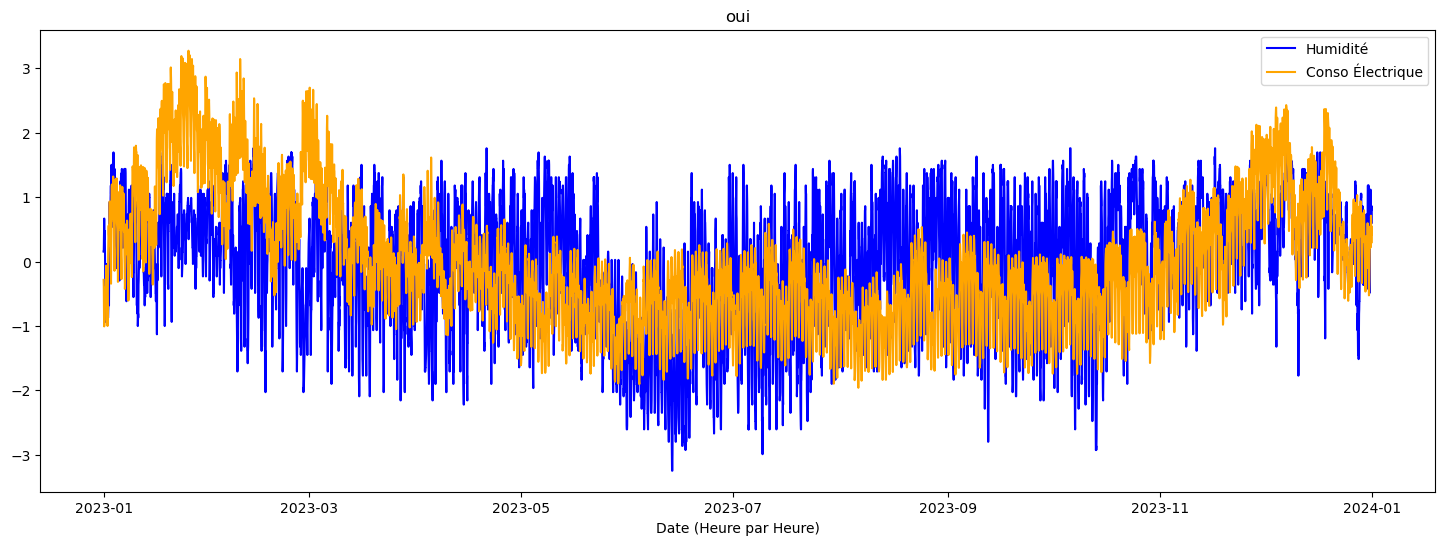

In [209]:
plt.figure(figsize=(18, 6))  # Taille de la figure
plt.plot(ds['time_utc'], ds['strasbourg_relative_humidity_2m (%)'], color='blue', label="Humidité")
plt.plot(ds['time_utc'], ds['actual_load_MW'], color='orange', label="Conso Électrique")
# Ajouter un titre et des labels
plt.title('oui')
plt.xlabel('Date (Heure par Heure)')
plt.legend()
# Afficher le graphique
plt.show()
